## Генерация данных

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [2]:
def generate_linear_data(num_samples=200, noise=0.0, k=-1, b=2):
    X = np.random.uniform(-5, 5, size=(num_samples, 2))
    y = (X[:, 1] > k * X[:, 0] + b).astype(int)
    if noise > 0:
        flip_indices = np.random.choice(num_samples, int(noise * num_samples), replace=False)
        y[flip_indices] = 1 - y[flip_indices]
    return X, y


def generate_nonlinear_data(num_samples=200, noise=0.0, a=2, b=1):
    X = np.random.uniform(-5, 5, size=(num_samples, 2))
    distances = (X[:, 0]**2 / a**2) + (X[:, 1]**2 / b**2)
    y = (distances <= 1).astype(int)
    if noise > 0:
        flip_indices = np.random.choice(num_samples, int(noise * num_samples), replace=False)
        y[flip_indices] = 1 - y[flip_indices]
    return X, y

Прогон:

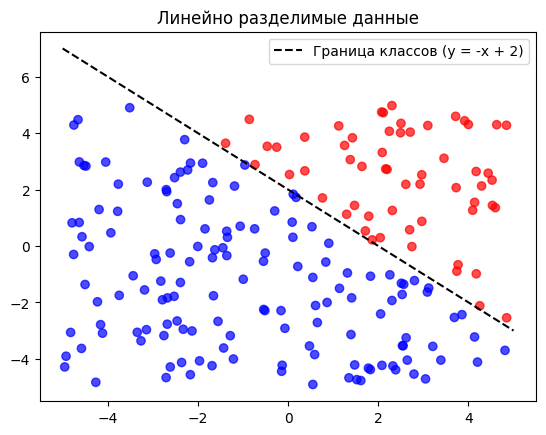

In [11]:
k = -1
b = 2
X_linear, y_linear = generate_linear_data(num_samples=200, noise=0.0, k=k, b=b)
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap='bwr', alpha=0.7)
x_vals = np.linspace(-5, 5, 100)
y_vals = k * x_vals + b  # y = kx + b
plt.plot(x_vals, y_vals, 'k--', label="Граница классов (y = -x + 2)")
plt.title("Линейно разделимые данные")
plt.legend()
plt.show()

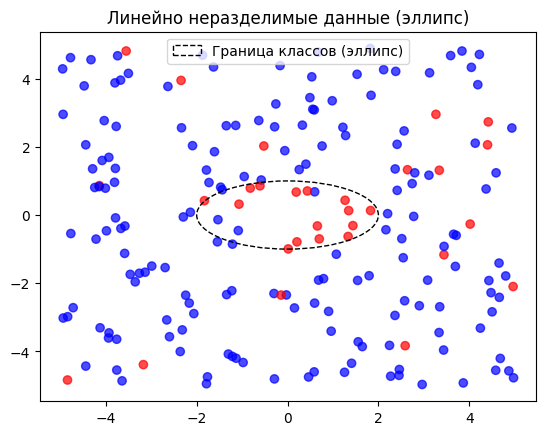

In [10]:
X_nonlinear, y_nonlinear = generate_nonlinear_data(num_samples=200, noise=0.1, a=2, b=1)
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear, cmap='bwr', alpha=0.7)
ellipse = Ellipse(xy=(0, 0), width=2*2, height=2*1, edgecolor='k', facecolor='none', linestyle='--', label="Граница классов (эллипс)")
plt.gca().add_patch(ellipse)
plt.title("Линейно неразделимые данные (эллипс)")
plt.legend()
plt.show()